In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, AvgPool2D, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import plot_model
import pydot
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
testing_path = 'D:\\Research Dataset\\Shrimp Recognition\\validating\\' 
training_path = 'D:\\Research Dataset\\Shrimp Recognition\\training\\'
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (224,224),batch_size = 32,)
test_dataset = test_datagen.flow_from_directory(testing_path,target_size = (224,224),batch_size = 32,)

""".fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""


Found 38042 images belonging to 4 classes.
Found 4681 images belonging to 4 classes.


'.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.\n.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.\n'

In [3]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Load the VGG19 base model (excluding top fully-connected layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG19 layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

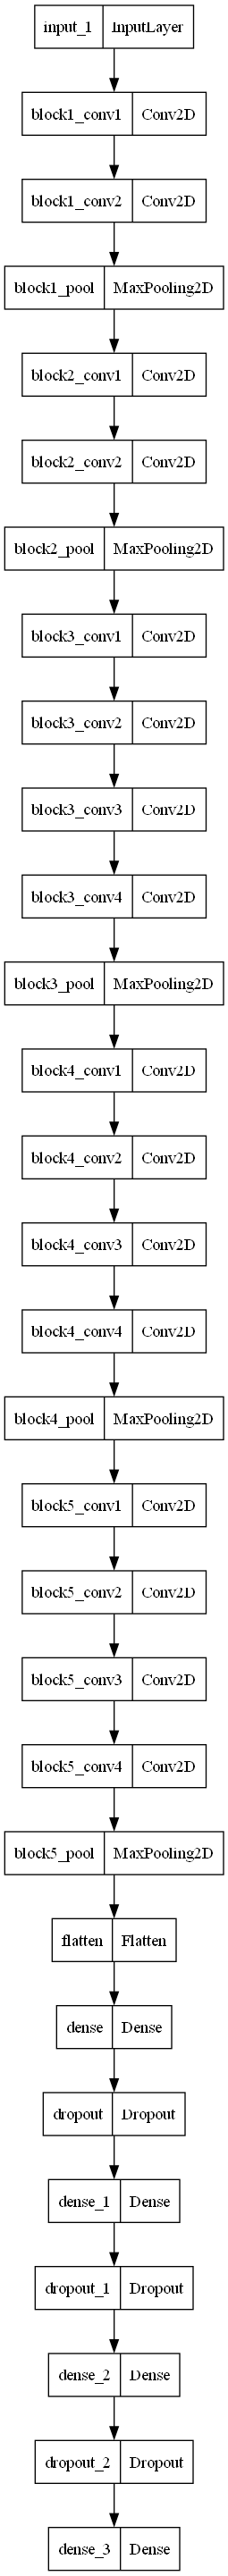

In [4]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
plot_model(model,to_file='vgg19_model.png')

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg19_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='max')

In [7]:
history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 50,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(test_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/50
1189/1189 [==============================] - ETA: 0s - loss: 0.3961 - accuracy: 0.8484
Epoch 1: val_accuracy improved from -inf to 0.95065, saving model to vgg19_model.h5
1189/1189 [==============================] - 221s 179ms/step - loss: 0.3961 - accuracy: 0.8484 - val_loss: 0.1472 - val_accuracy: 0.9507
Epoch 2/50
1189/1189 [==============================] - ETA: 0s - loss: 0.2957 - accuracy: 0.8812
Epoch 2: val_accuracy improved from 0.95065 to 0.98569, saving model to vgg19_model.h5
1189/1189 [==============================] - 198s 167ms/step - loss: 0.2957 - accuracy: 0.8812 - val_loss: 0.0526 - val_accuracy: 0.9857
Epoch 3/50
1189/1189 [==============================] - ETA: 0s - loss: 0.2275 - accuracy: 0.9056
Epoch 3: val_accuracy did not improve from 0.98569
1189/1189 [==============================] - 205s 173ms/step - loss: 0.2275 - accuracy: 0.9056 - val_loss: 0.0581 - val_accuracy: 0.9850
Epoch 4/50
1189/1189 [==============================] - ETA: 0s - loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


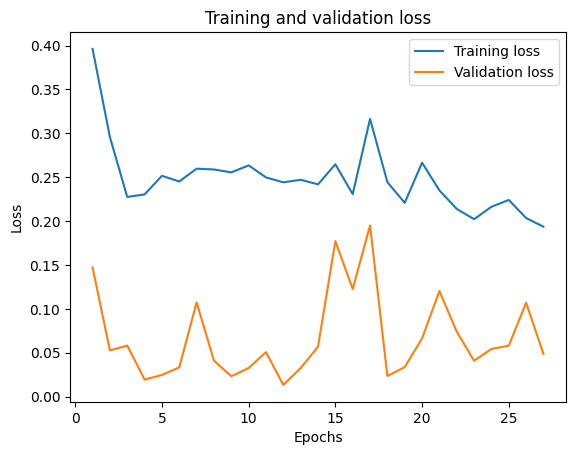

In [12]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig("Model_2_trainingVsvalidationLoss.jpeg")
plt.show()


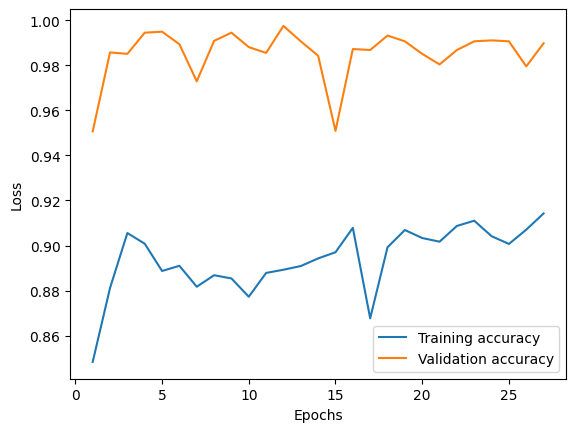

In [13]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
# plt.savefig("Model_1_trainingVsvalidationAccuracy.jpeg")
plt.show()

In [14]:
import pandas as pd 
his_df = pd.DataFrame(history_dict)

In [15]:
his_df.to_excel('vgg19_history.xlsx',index=False)